Prova 3 - Análise Multivariada

Yhasmim de Souza Tigre

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA

Análise de Correspondência (AC)<br/>
Para um conjunto de dados categóricos (como uma tabela de contingência).

EXERCISE 13.3 Do a correspondence analysis for the car marks data (Table B.7)! Explain
how this table can be considered as a contingency table.

Resposta: A tabela B.7 pode ser considerada uma tabela de contingência porque apresenta uma matriz onde as linhas representam diferentes marcas de carro e as colunas representam características como Economia, Serviço, Valor, etc. Cada célula contém um valor numérico que reflete uma medição ou pontuação associada àquela combinação de marca e característica.

Matematicamente, uma tabela de contingência é útil para calcular probabilidades e proporções. Por exemplo, podemos determinar a frequência relativa de cada característica em relação ao total de marcas, permitindo a análise das associações entre as variáveis. Além disso, a análise de correspondência utiliza técnicas como a decomposição em valores singulares (SVD) para explorar as relações entre as linhas e colunas, ajudando a identificar padrões e agrupamentos nos dados.

In [ ]:
data = {
    'Economy': [3.9, 4.8, 3.0, 5.3, 2.1, 2.3, 2.5, 4.6, 3.2, 2.6, 4.1, 3.2, 2.6, 2.2, 3.1, 2.9, 2.7, 3.9, 2.5, 3.8, 3.6, 2.4, 3.1, 3.7],
    'Service': [2.8, 1.6, 3.8, 2.9, 3.9, 3.1, 3.4, 2.4, 3.9, 3.3, 1.7, 2.9, 3.3, 2.4, 2.6, 3.5, 3.3, 2.8, 2.9, 2.3, 4.7, 2.1, 2.2, 4.7],
    'Value': [2.2, 1.9, 3.8, 2.2, 4.0, 3.4, 3.2, 1.6, 4.3, 3.7, 1.8, 3.2, 3.9, 3.0, 2.3, 3.6, 3.4, 2.6, 3.4, 1.9, 5.5, 2.0, 2.1, 5.5],
    'Price': [4.2, 5.0, 2.7, 5.9, 2.6, 2.6, 2.2, 5.5, 2.0, 2.8, 4.6, 3.5, 2.1, 2.6, 3.6, 2.8, 3.0, 4.0, 3.0, 4.2, 1.5, 2.6, 3.2, 1.7],
    'Design': [3.0, 2.0, 4.0, 1.7, 4.5, 3.2, 3.3, 1.3, 4.3, 3.7, 2.4, 3.1, 3.5, 3.2, 2.8, 3.2, 3.1, 2.6, 3.2, 3.1, 4.1, 3.2, 3.5, 4.8],
    'Sporty': [3.1, 2.5, 4.4, 1.1, 4.4, 3.3, 3.3, 1.6, 4.5, 3.0, 3.2, 3.1, 3.9, 4.0, 2.9, 3.8, 3.4, 3.0, 3.1, 3.6, 5.8, 3.1, 3.5, 5.2],
    'Safety': [2.4, 1.6, 4.0, 3.3, 4.4, 3.6, 3.3, 2.8, 4.7, 3.7, 1.4, 2.9, 3.8, 2.9, 2.4, 3.2, 3.0, 3.2, 3.2, 1.6, 5.9, 3.1, 2.8, 5.5],
    'Easy_handling': [2.8, 2.8, 2.6, 4.3, 2.2, 2.8, 2.4, 3.6, 2.9, 3.1, 2.4, 2.6, 2.4, 2.4, 2.4, 2.6, 2.7, 3.0, 2.8, 2.4, 3.1, 1.6, 1.8, 4.0]
}

car_types = ['Audi 100', 'BMW 5 series', 'Citroen AX', 'Ferrari', 'Fiat Uno', 'Ford Fiesta',
             'Hyundai Samara', 'Jaguar 323', 'Lada 200', 'Mazda Galant', 'Mercedes 323', 'Mitsubishi Galant',
             'Nissan Sunny', 'Opel Corsa', 'Opel Vectra', 'Peugeot 306', 'Renault 19', 'Rover Corolla',
             'Toyota 601', 'Volvo Golf', 'Trabant Passat', 'VW 1.3', 'VW Passat', 'Wartburg 1.3']

In [ ]:
df = pd.DataFrame(data, index=car_types)

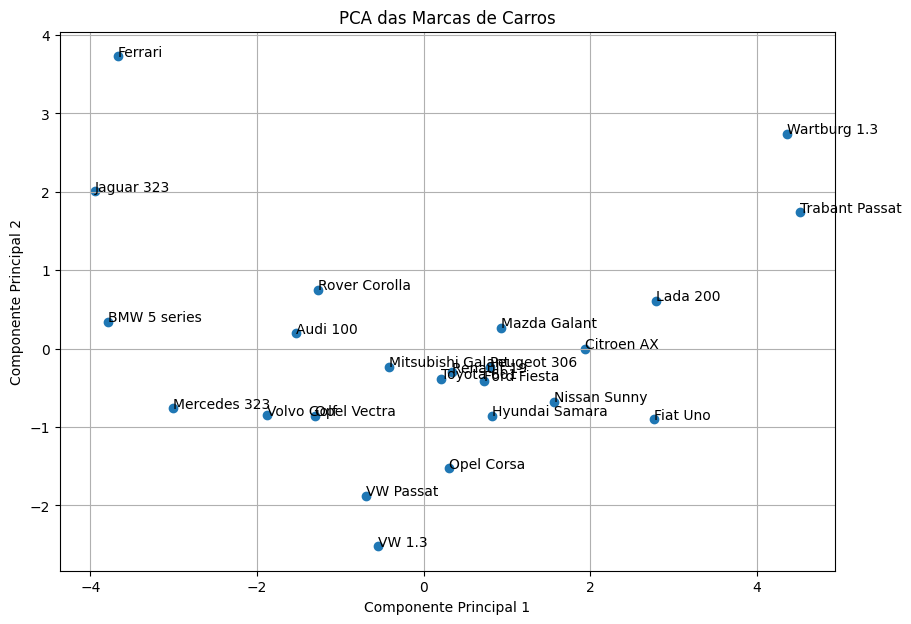

Variância explicada pelas componentes principais: [0.65967381 0.24173085]


In [ ]:
# Padronizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicando PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Plotando as duas primeiras componentes principais
plt.figure(figsize=(10,7))
plt.scatter(pca_components[:, 0], pca_components[:, 1])

for i, car in enumerate(car_types):
    plt.text(pca_components[i, 0], pca_components[i, 1], car)

plt.title('PCA das Marcas de Carros')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# Variância explicada
print("Variância explicada pelas componentes principais:", pca.explained_variance_ratio_)


Análise de Correlação Canônica (CCA) <br/>
para avaliar a relação entre dois conjuntos de variáveis.

EXERCISE 14.2 Perform the canonical correlation analysis for the following subsets of vari-
ables: X corresponding to {price} and Y corresponding to {economy, easy handling} from
the car marks data (Table B.7)

Resposta: A Análise de Correlação Canônica (CCA) é utilizada para examinar a relação entre dois conjuntos de variáveis, neste caso, price (X) e {economy, easy handling} (Y). A CCA calcula combinações lineares das variáveis de cada conjunto que maximizam a correlação entre essas combinações.

Matematicamente, isso é feito através da maximização do coeficiente de correlação canônica, que é uma medida da força da relação entre os dois conjuntos. O método resolve um problema de autovalores, onde as combinações canônicas correspondem a autovetores das matrizes de covariância dos conjuntos X e Y. A interpretação dos resultados fornece insights sobre como as variáveis de um conjunto influenciam as do outro, ajudando na compreensão de relações multivariadas.

In [ ]:
data = {
    "Type": ["Audi", "BMW", "Citroen", "Ferrari", "Fiat", "Ford", "Hyundai", "Jaguar", "Lada", "Mazda", "Mercedes", "Mitsubishi", "Nissan", "Opel", "Opel", "Peugeot", "Renault", "Rover", "Toyota", "Volvo", "Trabant", "VW", "VW", "Wartburg"],
    "Model": ["100", "5 series", "AX", "Ferrari", "Uno", "Fiesta", "Hyundai", "Jaguar", "Samara", "323", "200", "Galant", "Sunny", "Corsa", "Vectra", "306", "19", "Rover", "Corolla", "Volvo", "601", "Golf", "Passat", "Wartburg"],
    "Economy": [3.9, 4.8, 3.0, 5.3, 2.1, 2.3, 2.5, 4.6, 3.2, 2.6, 4.1, 3.2, 2.6, 2.2, 3.1, 2.9, 2.7, 3.9, 2.5, 3.8, 3.6, 2.4, 3.1, 1.3],
    "Service": [2.8, 1.6, 3.8, 2.9, 3.9, 3.1, 3.4, 2.4, 3.9, 3.3, 1.7, 2.9, 3.3, 2.4, 2.6, 3.5, 3.3, 2.8, 2.9, 2.3, 4.7, 2.1, 2.2, 3.7],
    "Value": [2.2, 1.9, 3.8, 2.2, 4.0, 3.4, 3.2, 1.6, 4.3, 3.7, 1.8, 3.2, 3.9, 3.0, 2.3, 3.6, 3.4, 2.6, 3.4, 1.9, 5.5, 2.0, 2.1, 4.7],
    "Price": [4.2, 5.0, 2.7, 5.9, 2.6, 2.6, 2.2, 5.5, 2.0, 2.8, 4.6, 3.5, 2.1, 2.6, 3.6, 2.8, 3.0, 4.0, 3.0, 4.2, 1.5, 2.6, 3.2, 5.5],
    "Design": [3.0, 2.0, 4.0, 1.7, 4.5, 3.2, 3.3, 1.3, 4.3, 3.7, 2.4, 3.1, 3.5, 3.2, 2.8, 3.2, 3.1, 2.6, 3.2, 3.1, 4.1, 3.2, 3.5, 1.7],
    "Sport": [3.1, 2.5, 4.4, 1.1, 4.4, 3.3, 3.3, 1.6, 4.5, 3.0, 3.2, 3.1, 3.9, 4.0, 2.9, 3.8, 3.4, 3.0, 3.1, 3.6, 5.8, 3.1, 3.5, 4.8],
    "Safety": [2.4, 1.6, 4.0, 3.3, 4.4, 3.6, 3.3, 2.8, 4.7, 3.7, 1.4, 2.9, 3.8, 2.9, 2.4, 3.2, 3.0, 3.2, 3.2, 1.6, 5.9, 3.1, 2.8, 5.2],
    "Easy h.": [2.8, 2.8, 2.6, 4.3, 2.2, 2.8, 2.4, 3.6, 2.9, 3.1, 2.4, 2.6, 2.4, 2.4, 2.4, 2.6, 2.7, 3.0, 2.8, 2.4, 3.1, 1.6, 1.8, 4.0]
}

df = pd.DataFrame(data)

Coeficientes canônicos de X:
[[1.]]
Coeficientes canônicos de Y:
[[0.67786339]
 [0.73518788]]


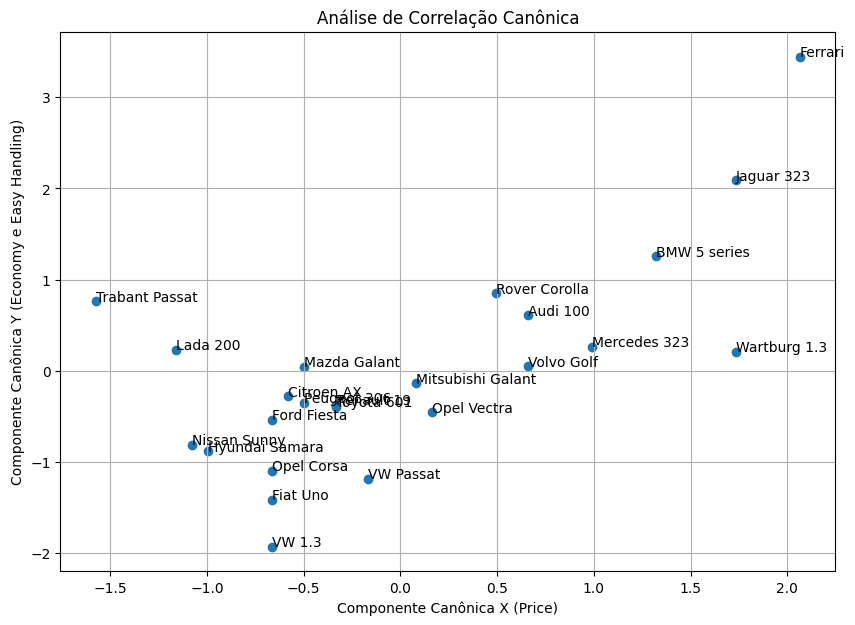

In [ ]:
# Definindo os subconjuntos de variáveis
X = df[['Price']]
Y = df[['Economy', 'Easy h.']]

# Normalizando os dados
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

# Aplicando a Análise de Correlação Canônica
cca = CCA(n_components=1)  # Como temos apenas uma variável em X, vamos usar 1 componente
cca.fit(X, Y)

# Coeficientes canônicos
X_c, Y_c = cca.transform(X, Y)
coeficientes_X = cca.x_weights_
coeficientes_Y = cca.y_weights_

print("Coeficientes canônicos de X:")
print(coeficientes_X)
print("Coeficientes canônicos de Y:")
print(coeficientes_Y)

# Plotando os resultados
plt.figure(figsize=(10, 7))
plt.scatter(X_c, Y_c)
plt.xlabel('Componente Canônica X (Price)')
plt.ylabel('Componente Canônica Y (Economy e Easy Handling)')
plt.title('Análise de Correlação Canônica')
plt.grid(True)

# Adicionando os rótulos
for i, car in enumerate(car_types):
    plt.text(X_c[i], Y_c[i, 0], car)

plt.show()


Multidimensional Scaling (MDS) <br/>
usar MDS para visualizar a proximidade entre pontos em um espaço de menor dimensão.


EXERCISE 15.1 Apply the MDS method to the Swiss bank note data. What do you expect
to see ?

Resposta: o Método de Distância Euclidiana (MDS) emprega a distância Euclidiana para determinar a congruência entre as observações. O procedimento se fundamenta na redução da discrepância entre as distâncias dos dados originais e as distâncias no novo espaço. Isso é realizado através de uma estratégia de otimização denominada "minimização do estresse", na qual uma função de custo, denominada "stress", avalia a diferença entre as distâncias iniciais e as distâncias projetadas. A meta final é determinar uma disposição de pontos no espaço limitado que reduza esse estresse.

esse método é bom para reconhecer padrões nos dados, uma vez que auxilia na visualização da estrutura interna das informações, possibilitando a identificação de agrupamentos ou discrepâncias com base nas semelhanças das características examinadas. Logo, o MDS é um instrumento eficaz para a visualização.

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df_b2 = pd.read_csv('/content/B2_swiss-bank-notes.csv')

# Print the first few rows of the DataFrame to verify it was loaded correctly
print(df_b2 .head())

   Length   Height(left)   Height(right)   InnerFrame(lower)  \
0   214.8          131.0           131.1                 9.0   
1   214.6          129.7           129.7                 8.1   
2   214.8          129.7           129.7                 8.7   
3   214.8          129.7           129.6                 7.5   
4   215.0          129.6           129.7                10.4   

    InnerFrame(upper)   Diagonal  
0                 9.7      141.0  
1                 9.5      141.7  
2                 9.6      142.2  
3                10.4      142.0  
4                 7.7      141.8  


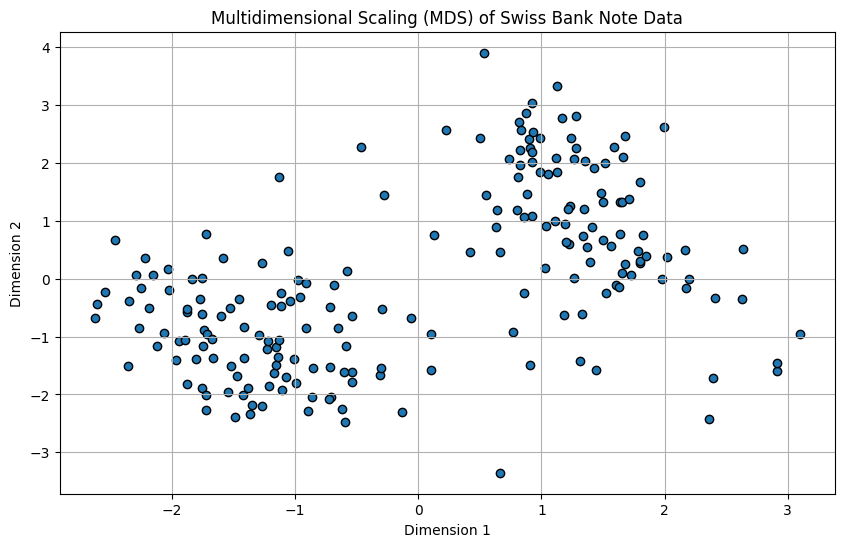

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Selecionar apenas as colunas numéricas
numeric_data = df_b2.values

# Aplicar o MDS com 2 dimensões
mds = MDS(n_components=2, random_state=42)
mds_results = mds.fit_transform(numeric_data)

# Criar um DataFrame para os resultados do MDS
mds_df = pd.DataFrame(mds_results, columns=['Dim1', 'Dim2'])

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(mds_df['Dim1'], mds_df['Dim2'], marker='o', edgecolor='k')
plt.title('Multidimensional Scaling (MDS) of Swiss Bank Note Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid()
plt.show()
